# pymgcv: Generalized Additive Models in Python

**pymgcv** provides a python interface and visualisation tools for R's powerful [mgcv](https://cran.r-project.org/web/packages/mgcv/index.html) library for fitting Generalized Additive Models (GAMs).


## Installation
!!! warning

    The package is very new. Expect breaking changes without waning until the package stabilises.

Installing the python package only includes the python package and dependencies. This means an R installation with ``mgcv`` is also required.
Conda and pixi provide two convenient options for handling both Python and R dependencies:

**Using conda and pip**:

- Install ``conda`` e.g. [miniforge](https://github.com/conda-forge/miniforge)

```bash
conda create --name my_env python r-base r-mgcv
conda activate my_env
python -m pip install pymgcv
```

**Using pixi**:

- Install [pixi](https://github.com/prefix-dev/pixi)
```bash
pixi init
pixi add python r-base r-mgcv
pixi add --pypi pymgcv
pixi shell
```

Using either method the below example should now run e.g. in the terminal after running ``python``, or in an IDE after selecting the pixi/conda environment

## What are GAMs?

Generalized Additive Models (GAMs) are a flexible class of statistical models that extend linear models by allowing non-linear relationships between predictors and the response variable. For example the model may have the form

$$
g(\mathbb{E}[Y]) = \beta_0 + \sum_{j=1}^p f_j(x_j),
$$
Where:

- $g$ is the link function, which transforms the expected value of the response variable to a space where modelling with the sum of smooths is reasonable.
- $f_j$ are smooth functions (e.g. splines) which capture the non-linear relationship between the features and the response.
- Bivariate $f(x_1, x_2)$ (and multivariate) smooths are also possible, when interactions are important.

Why GAMs?

- **Flexibility**: Capture non-linear relationships automatically
- **Interpretability**: The additive nature allows each term to be visualized and understood separately
- **Statistical rigor**: Built-in smoothing parameter estimation and uncertainty quantification

## Simple example

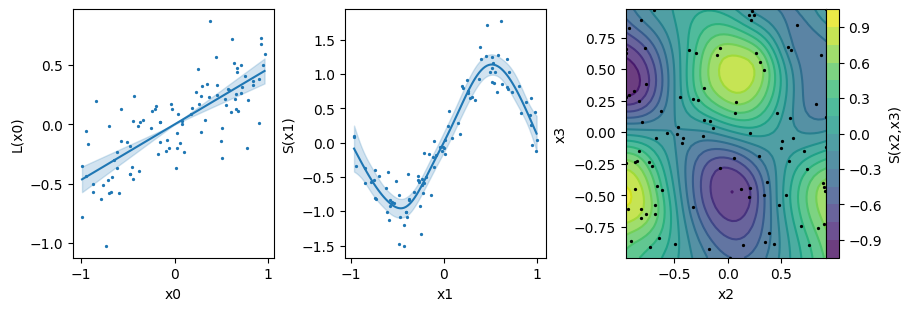

In [1]:
import numpy as np
import pandas as pd

import pymgcv.plot as gplt
from pymgcv.gam import GAM
from pymgcv.terms import L, S

rng = np.random.default_rng(1)
n = 100
x0, x1, x2, x3 = [rng.uniform(-1, 1, n) for _ in range(4)]
y = (
    0.5 * x0 +
    np.sin(np.pi * x1) +
    np.cos(np.pi * x2) * np.sin(np.pi * x3) +
    rng.normal(0, 0.3, n)
)
data = pd.DataFrame({'x0': x0, 'x1': x1, 'x2': x2, 'x3': x3, 'y': y})

gam = GAM({'y': L('x0') + S('x1') + S('x2', 'x3')})
gam.fit(data)
fig, ax = gplt.plot(gam, scatter=True, ncols=3) # plot partial effects
fig.set_size_inches(9, 3)
fig.show()

!!! note 

    Adding terms `L("x0") + S("x1")` is just syntactic sugar for defining a list of `[L("x0"), S("x1")]`

## What next?

The key bits of information to explore:

1. **[Terms](./api/terms.md)**: The types of terms supported by **pymgcv** (e.g. smooths, linear, interactions, etc)
2. **[Basis Functions](./api/basis_functions.md)**: The available basis functions 
2. **[Families](./api/families.md)**: The available error distribution families and link functions 
3. The examples in the side bar!